In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Loading the dataset
dataset = pd.read_csv("Tagged_Dataset.csv")
dataset_deg = pd.read_csv("Tagged_datasetWithDegree.csv")

dataset_deg.loc[dataset_deg["Degree"]==25, 'Degree'] = 0.25
dataset_deg.loc[dataset_deg["Degree"]==50, 'Degree'] = 0.50
dataset_deg.loc[dataset_deg["Degree"]==75, 'Degree'] = 0.75
dataset_deg.loc[dataset_deg["Degree"]==100, 'Degree'] = 1

import tensorflow as tf

print(tf.__version__)

1.13.1


In [3]:
# Plot label histogram
# dataset.emotions.value_counts().plot.bar()
import matplotlib
dataset.emotions.value_counts().plot("bar")

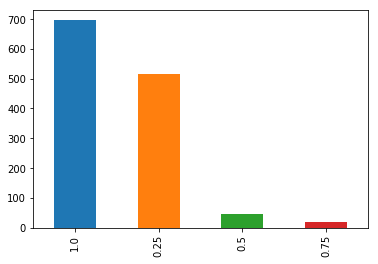

In [4]:
dataset_deg.Degree.value_counts().plot("bar")

In [5]:
# Print some samples
#dataset.head(10)

In [6]:
#need to convert the text column to strings of all lowercase
dataset['text'] = dataset['text'].str.lower()
dataset_deg['text'] = dataset_deg['text'].str.lower()
#dataset.head(10)

In [7]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize

input_unprocsentences = [word_tokenize(text) for text in dataset["text"].values.tolist()]#tokenize each sentence into words
labels = dataset["emotions"].values.tolist()
input_unprocsentences_deg = [word_tokenize(text) for text in dataset_deg["text"].values.tolist()]
labels_degree = dataset_deg["Degree"].values.tolist()

In [8]:
def preprocess(sentence):  #filter words to include only NAVA words ->Nouns,Adverbs,Verbs
    NAVA_words=[]
    taggED=nltk.pos_tag(sentence)

    for t in taggED:
        if t[1].startswith('NN') or t[1].startswith('JJ') or t[1].startswith('VB') or t[1].startswith('RB'):
            if t[1].startswith('NNP') :
                continue
            NAVA_words.append(t[0])
    
    return(NAVA_words)

In [9]:
#nltk.help.upenn_tagset()

In [56]:
input_sentences = []
count = 1
for sentence in input_unprocsentences :
    s=preprocess(sentence)
    if count == 1:
        print(s)
    input_sentences.append(s)

['mortar', 'assault', 'leaves', 'least', 'dead']
['goal', 'delight', 'sheva']
['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
['bombers', 'kill', 'shoppers']
['vegetables', 'not', 'fruit', 'slow', 'brain', 'decline']
['pm', 'havana', 'deal', 'good', 'experiment']
['kate', 'is', 'marrying', 'doherty']
['nasa', 'revisiting', 'life', 'mars', 'question']
['happy', 'birthday', 'ipod']
['alonso', 'be', 'happy', 'retire', 'titles']
['madonna', 'new', 'tot', 'home', 'london']
['nicole', 'kidman', 'asks', 'dad', 'help', 'stop', 'husband', 'drinking']
['united', 'finds', 'good', 'connection', 'win']
['making', 'good', 'making', 'nice']
['were', "'arrogant", 'stupid', 'iraq', 'says', 'diplomat']
['bad', 'reasons', 'be', 'good']
['madonna', 'new', 'baby', 'daddy', 'did', "n't", 'realize', 'adoption', 'was', 'good']
['women', 'perfectly', 'good', 'mothers']
["'re", 'pretty', 'kind', "'bully"]
['moderate', 'drinking', 'reduces', 'men', 'heart', 'attack', 'risk']
['tom', 'cruise', 'katie', 'h

['amish', 'schoolhouse', 'torn', 'down']
['warner', 'not', 'run', "'08"]
['reid', 'land', 'deal', 'scrutiny']
['flooding', 'washes', 'road', 'valdez', 'alaska']
['briton', 'admits', 'u.s.', 'bomb', 'plot', 'role']
['commentary', 'minutemen', 'have', 'right', 'be', 'idiotic']
['madonna', 'files', 'adoption', 'papers']
['gunmen', 'kill', 'iraqi', 'tv', 'station']
['hastert', 'sorry', 'scandal', 'not', 'quitting']
['ex-jonbenet', 'suspect', 'child', 'porn', 'case', 'dropped']
['waste', 'plant', 'fire', 'forces', 'evacuate']
['toddler', 'died', 'e.', 'coli', 'tainted', 'spinach']
['disturbing', 'finds', 'child', 'sex', 'raids']
['magazine', 'lists', 'women', 'had', 'abortions']
['pot', 'smokers', 'avoid', 'alzheimer', 'study', 'says']
['student', 'starts', 'white', 'men', 'club', 'campus']
['kentucky', 'wants', 'ban', 'alcohol', 'inhalers']
['peter', 'pan', 'flies', 'chapter']
['teen', 'repellent', 'inventor', 'wins', 'infamous', 'prize']
['cher', 'dress', 'car', 'bed', 'have', 'new', 'own

['attack', 'video', 'saddens', 'friendly', 'fire', 'widow']
['europe', 'retain', 'trophy', 'big', 'win']
['cutting', 'edge', 'accessories', 'digital', 'music', 'players']
['ice', 'storm', 'descends', 'central', 'u.s']
['snow', 'brings', 'travel', 'misery', 'england']
['indonesia', 'flood', 'forces', 'homes']
['iraqi', 'health', 'minister', 'seized', 'raid']
['ice', 'storm', 'brings', 'chaos', 'u.s']
['stinky', 'flower', 'mystery', 'solved']
['congressman', 'rebukes', 'u.s.', 'allies', 'lack', 'support', 'afghanistan']
['roddick', 'overcomes', 'federer', 'final']
['prehistoric', 'romeo', 'juliet', 'discovered']
['donald', 'goydos', 'share', 'sony', 'lead']
['u.s.', 'iraqis', 'are', 'wrangling', 'war', 'plans']
['sea', 'search', 'missing', 'microsoft', 'scientist']
['iran', 'hit', 'interests', 'attacked']
['blair', 'terror', 'battle', 'be', 'long']
['bear', 'cub', 'returned', 'wilderness']
['carrefour', 'sales', 'growth', 'falls', 'short']
['allied', 'democrats', 'lieberman', 'easily', '

['ready', 'eat', 'chicken', 'breasts', 'recalled', 'due', 'suspected', 'listeria']
['fully-cooked', 'chicken', 'strips', 'recalled']
['committee', 'debates', 'cancer', 'vaccine', 'plan']
['stop', 'cancer', 'shot']
['mln', 'birds', 'be', 'vaccinated', 'bird', 'flu', 'moscow']
['thousands', 'tested', 'russian', 'h5n1', 'outbreak']
['russian', 'bird', 'flu', 'outbreak', 'is', 'deadly', 'asian', 'strain']
['bernard', 'matthews', 'lay', 'up', 'workers']
['matthews', 'lays', 'turkey', 'workers']
['reopening', 'bird', 'flu-hitfactory', 'ignores', 'risks', 'poultryman']
['goodbye', 'girlhood']
['media', 'cited', 'showing', 'girls', 'sex', 'objects']
['sexualisation', "'harms", 'young', 'girls']
['shot', 'arm']
['thousands', 'line', 'up', 'get', 'late', 'flu', 'shots']
['king', 'county', 'offering', 'free', 'flu', 'vaccines']
['bush', 'vows', 'cooperation', 'health', 'care']
['health', 'returns', 'hot', 'issue', 'race']
['small-business', 'owners', 'find', 'bush', 'health', 'plan', 'appealing']

['start', 'late', 'retire', 'rich']
['somali', 'pm', 'vows', 'bring', 'islamists', 'justice']
['swingers', 'more', 'common', 'most', 'think']
['anna', 'nicole', 'smith', 'fans', 'mourn', 'cyberspace']
['antibiotic', 'ketek', 'more', 'dangerous', 'thought']
['time', 'book', 'cruise']
["'blazing", 'angels', 'ps3', 'fails', 'soar']
['north', 'korea', 'aid', 'demand', 'stall', 'talks']
['cartoon', 'network', 'head', 'steps']
['malaysia', 'aggressively', 'wooing', 'tourists']
['anna', 'nicole', 'smith', 'bahamas', 'home', 'seized']
['andromeda', 'involved', 'galactic', 'collision']
['rwanda', 'mulling', '3-kid', 'limit', 'families']
['wilkinson', 'sets', 'record', 'tame', 'win']
['army', 'engineers', 'say', 'dam', 'safe']
['france', 'al', 'qaeda', 'suspects', 'arrested']
['utah', 'gunman', 'survived', 'srebrenica']
['creating', 'whole', 'album', 'month']
['india', 'test', 'new', 'nuclear', 'missile']
['g7', 'china', 'ease', 'exchange', 'rate', 'grip']
['hatton', 'hands', 'back', 'ibf', 'tit

['u.s.', 'online', 'love', 'brokers', 'eye', 'china']
['u.s.', 'diverts', 'troops', 'fight', 'taliban']
["'house", 'cards', 'actor', 'ian', 'richardson', 'dead']
['taliban', 'leader', 'killed', 'airstrike']
['escape', 'prague', 'summer', 'hordes']
['kathmandu', 'first', 'snow', 'years']
['nasdaq', 'fails', 'bid', 'lse']
['ex-pastor', 'gets', 'death', 'sentence']
['baby', 'born', 'turnpike', 'dad', 'misses', 'exit']
['study', 'links', 'chimps', "'hammers"]
['un-google', 'earth', 'map', 'climate', 'change']
['i', 'had', 'shouted', 'younger', 'brother', 'was', 'always', 'afraid', 'i', 'called', 'loudly']
['days', 'i', 'feel', 'close', 'partner', 'other', 'friends', 'i', 'feel', 'peace', 'also', 'experience', 'close', 'contact', 'people', 'i', 'regard', 'greatly']
['time', 'i', 'imagine', 'someone', 'i', 'love', 'i', 'contact', 'serious', 'illness', 'even', 'death']
['i', 'had', 'been', 'obviously', 'unjustly', 'treated', 'had', 'possibility', 'elucidating']
['i', 'think', 'short', 'time',

['t.v', 'i', 'saw', 'news', 'feature', 'south', 'africa', 'policeman', 'attacked', 'group', 'black', 'people', 'whip']
['thought', 'having', 'read', 'boring', 'book', 'pages', 'english']
['grovelling', 'people']
['observing', 'someone', 'cafeteria', 'noisily', 'gulping', 'food', 'having', 'extremely', 'bad', 'manners']
['sister', 'history', 'abortion', 'stillbirth', 'gave', 'birth', 'perfectly', 'healty', 'boy']
['sister', 'had', 'still', 'born', 'child', 'was', 'emotionally', 'very', 'deep', 'down', 'took', 'long', 'time', 'recover']
['were', 'starting', 'student', 'project', 'teacher', 'talked', 'was', 'very', 'negative', 'not', 'very', 'helpful']
['boyfriend', 'openly', 'let', 'preferring', 'girl']
['i', 'felt', 'disgust', 'boyfriend', 'time', 'had', 'left']
['unexpected', 'visit', 'close', 'friend', 'i', 'had', "n't", 'seen', 'year']
['i', 'wandered', 'mistake', 'safety', 'zone', 'shooting', 'range', 'was', 'shot']
['being', 'treated', 'unfairly']
['breaking', 'girl']
['nothing']
[

['member', 'family', 'complains', 'food', 'is', 'served', 'disgusts']
['i', 'was', 'informed', 'i', 'had', 'been', 'accepted', 'student', 'psychology']
['i', 'was', 'little', 'fishing', 'boat', 'ran', 'hard', 'weather', 'open', 'sea']
['i', 'found', 'guy', 'i', 'was', 'dating', 'particular', 'time', 'had', 'steady', 'relationship', 'going', 'someone', 'else', 'long', 'time']
['i', 'felt', 'sad', 'depressed', 'i', 'heard', 'cat', 'had', 'died']
['i', 'was', 'working', 'nurse', 'mental', 'hospital', 'patient', 'ate', 'contents', 'patient', 'spitoon']
['i', 'was', 'acceptted', 'student', 'psychology']
['son', 'has', 'pain', 'leg', 'apparent', 'reason']
['week', 'school', 'teacher', 'sent', 'note', 'home', 'saying', 'son', 'was', 'inattentive', 'unable', 'do', 'lessons']
['i', 'thought', 'was', 'going', 'be', 'impossible', 'start', 'studying', 'due', 'wrong', 'information', 'student', 'advisor']
['certain', 'person', 'lack', 'cleanliness', 'home', 'personally']
['son', 'was', 'born']
['i',

['colleague', 'failed', 'contact', 'arranged', 'time']
['i', 'read', 'racist', 'slogans', 'walls']
['i', 'gave', 'birth', 'healthy', 'boy']
['husband', 'i', 'spent', 'night', 'ourselves', 'house', 'was', 'area', 'outskirts', 'large', 'town', 'were', 'not', 'familiar', 'heard', 'strange', 'noises', 'house', 'house', 'had', 'glass', 'walls', 'whole', 'thing', 'was', 'even', 'more', 'frightening']
['jealous', 'husband', 'old', 'girlfriend', 'met', 'husband', 'was', 'lot', 'reminiscing']
['daughter', 'had', 'problems', 'friends', 'i', 'see', 'predicament', 'window', 'was', 'given', 'cold', 'shoulder']
['i', 'was', 'auxiliary', 'nurse', 'hospital', 'i', 'had', 'change', 'nappies', 'first', 'time', 'very', 'old', 'sick', 'woman']
['husband', 'i', 'decided', 'take', 'few', 'days', 'holiday', 'particularly', 'trying', 'period']
['hospital', 'visit', 'prior', 'd', 'c', 'anasthesia', 'expected', 'miscarriage']
['exchange', 'points', 'view', 'sister', 'family', 'matter']
['treatment', 'become', '

['i', 'was', 'young', 'teenager', 'brother-in-law', 'be', 'had', 'made', 'heavy', 'advances', 'i', 'did', 'not', 'understand', 'very', 'well', 'was', 'i', 'reacted', 'strongly', 'feelings', 'are', 'still', 'there']
['i', 'made', 'dinner', 'friends', 'appreciated', 'very', 'much']
['i', 'was', 'nearly', 'knocked', 'i', 'was', 'cycling']
['father', 'i', 'had', 'argument', 'i', 'do', 'not', 'help', 'enough', 'home']
['i', 'had', 'intercourse', 'someone', 'then', 'i', 'realized', 'i', 'had', 'done', 'was', 'wrong', 'disgusted']
['intercourse']
['disappointment', 'friend']
['quarrelled', 'younger', 'brother']
['i', 'woke', 'nightmare']
['helping', 'older', 'people', 'toilet']
['i', 'was', 'notified', 'i', 'had', 'been', 'accepted', 'psychology', 'student']
['motor', 'failure', 'boat', 'gottenburg', 'were', 'heavy', 'seas', 'wind', 'was', 'strong', 'not', 'steer', 'boat', 'drifted', 'towards', 'rocks', 'did', 'not', 'succeed', 'attracting', 'attention', 'passerby', 'hours', 'had', 'elapsed']

['realizing', 'girlfriend', 'fact', 'had', 'started', 'process', 'breaking']
['political', 'military', 'trnsgressions', 'world', 'generally', 'speaking', 'not', 'be', 'described', 'questionaire']
['receiving', 'postcard', 'form', 'sweetheart', 'was', 'abroad', 'vacation', 'not', 'being', 'sure', 'write', 'not']
['i', 'tried', 'breake', 'boyfriend', 'refused', 'let', 'go']
['having', 'go', 'back', 'home', 'form', 'u.s.', 'having', 'been', 'ten', 'weeks', 'visit', 'brother', 'family']
['finding', 'glasses', 'again', 'having', 'lost', 'town']
['falling', 'cliff', 'mountains']
['having', 'fight', 'class', 'mate']
['gear', 'broke', 'car']
["n't", 'remember', 'having', 'had', 'feeling']
['i', 'got', 'job', 'right', 'school', 'was', 'over']
['going', 'home', 'alone', 'forest', 'girl', 'guide', 'meeting']
['i', 'get', 'angry', 'people', 'disbelieve', 'misunderstand']
['death', 'close', 'relative']
['having', 'been', 'unjustly', 'punished', 'i', 'feel', 'disgust', 'person', 'responsible']
['hav

['death', 'father', 'even', 'had', 'not', 'been', 'very', 'close', 'other']
['male', 'friend', 'mother', 'widow', 'moved', 'live', 'i', 'did', 'not', 'man']
['mother', 'sister', 'i', 'were', 'thinking', 'about', 'old', 'times', 'childhood', 'had', 'very', 'happy', 'time']
['husband', 'had', 'gone', 'drive', 'strange', 'broken', 'car', 'agreed', 'time', 'had', 'not', 'returned', 'i', 'feared', 'had', 'had', 'accident']
['i', 'am', 'school', 'teacher', 'classes', 'does', 'not', 'obey', 'keeps', 'talking', 'does', 'work', 'afternoon', 'everything', 'went', 'wrong', 'i', 'got', 'exceedingly', 'angry']
['young', 'close', 'relative', 'mine', 'died', 'leaving', 'baby', 'few', 'months', 'old']
['series', 'freud', 'was', 'shown', 'tv', 'tampon', 'had', 'been', 'set', 'nose', 'woman', 'forgotten', 'there', 'great', 'pain', 'was', 'taken', 'close-up', 'picture', 'woman', 'was', 'bleeding', 'nose', 'mouth']
['i', 'started', 'new', 'branch', 'studies', 'having', 'failed', 'former', 'one', 'i', 'got

['i', 'got', 'angry', 'friend', 'mine', 'i', 'caught', 'reading', 'notebook', 'almanach']
['grandmother', 'died', 'cancer']
['lift', 'drunken', 'fat', 'untidy', 'man', 'tried', 'make', 'advances']
['i', 'made', 'acquaintance', 'certain', 'person']
['abroad', 'driving', 'car', 'dark', 'winding', 'road']
['sister', 'took', 'things', 'having', 'asked', 'permission', 'first']
['grandfather', 'died']
['i', 'was', 'working', 'i', 'got', 'treated', 'way', 'i', 'felt', 'was', 'not', 'democratic']
['i', 'went', 'job', 'interview', 'i', 'met', 'person', 'was', 'very', 'nice', 'attitude', 'made', 'glad']
['episode', 'fright', 'happened', 'i', 'came', 'study', 'i', 'had', 'stand', 'front', 'still', 'unknown', 'fellow', 'students', 'talk', 'hands', 'shook', 'i', 'flushed', 'became', 'tongue-tied']
['i', 'was', 'restaurant', 'boyfriend', 'i', 'saw', 'best', 'female', 'friend', 'not', 'seeing', 'weeks', 'rejoyced', 'hugged', 'had', 'long', 'talk']
['evening', 'going', 'meet', 'friend', 'mine', 'i', '

['recently', 'good', 'friend', 'only', 'called', 'needed', 'something', 'never', 'said', 'please', 'thank', 'other', 'kind', 'word']
['favourite', 'horse', 'died', 'had', 'tried', 'best', 'save', 'was', 'hopeless', 'had', 'be', 'shot']
['i', 'read', 'book', 'sexual', 'phantasies', 'women', 'i', 'read', 'woman', 'having', 'sexual', 'intercourse', 'dog']
['i', 'met', 'good', 'friend', 'long', 'time', 'had', 'had', 'quarrel', 'weeks', 'i', 'was', 'really', 'glad', 'see', 'again']
['stayed', 'vienna', 'class', 'friend', 'i', 'behaved', 'incorrectly', 'teacher', 'threatened', 'exclusion', 'school']
['i', 'lost', 'driving', 'license', 'i', 'had', 'been', 'driving', 'influence', 'alcool']
['mother', 'death']
['i', 'entered', 'dissecting', 'room', 'first', 'time', 'i', 'think', 'i', 'felt', 'disgusted', 'mainly', 'bad', 'smell', 'formaline']
['father', 'stayed', 'abroad', 'year', 'does', 'not', 'like', 'write', 'letters', 'makes', 'ortographic', 'mistakes', 'i', 'never', 'had', 'good', 'relati

['once', 'school', 'class', 'went', 'skiing', 'steep', 'slope', 'boy', 'standing', 'lost', 'balance', 'fell', 'down', 'drew', 'i', 'slided', 'down', 'whole', 'slope', 'm', 'distance', 'tree', 'i', 'stop']
['happened', 'tram', 'older', 'people', 'started', 'grumble', 'young', 'people', 'just', 'i', 'had', 'not', 'immediately', 'left', 'seat']
['i', 'was', 'younger', 'i', 'was', 'very', 'good', 'apparatus', 'gymnastics', 'i', 'always', 'won', 'competitions', 'once', 'i', 'was', 'only', 'fourth', 'place']
['friend', 'was', 'assaulted', 'young', 'man', 'way', 'home']
['i', 'received', 'letter', 'christmas', 'present', 'person', 'i', 'had', 'not', 'seen', 'years']
['i', 'was', 'home', 'alone', 'mother', 'had', 'asked', 'heat', 'house', 'i', 'put', 'too', 'much', 'fuel', 'stove', 'began', 'glow', 'was', 'noise', 'whole', 'house', 'was', 'going', 'explode']
['end', 'holiday', 'job', 'i', 'got', 'less', 'money', 'was', 'due', 'nobody', 'mentioned', 'anything']
['little', 'cat', 'i', 'had', 'ra

['night', 'i', 'was', 'lying', 'bed', 'awake', 'i', 'had', 'eyes', 'closed', 'i', 'saw', 'figures', 'terrible', 'faces', 'black', 'frocks', 'bending', 'touching', 'i', 'opened', 'eyes', 'i', 'still', 'see', 'i', 'had', 'feeling', 'somebody', 'was', 'room', 'was', 'terrible', 'only', 'i', 'turned', 'light', 'i', 'was', 'able', 'go', 'sleep']
['i', 'had', 'arranged', 'friend', 'go', 'carinthia', 'car', 'had', 'arranged', 'place', 'meet', 'i', 'was', 'bit', 'late', 'friend', 'had', 'left', 'already', 'i', 'had', 'money', 'go', 'train', 'i', 'nearly', 'started', 'cry', 'i', 'was', 'so', 'angry', 'was', 'very', 'important', 'go', 'carinthia']
['dog', 'had', 'be', 'shot', 'had', 'killed', 'roe', 'i', 'liked', 'very', 'much', 'so', 'i', 'not', 'resign', 'i', 'hated', 'hunter', 'shot']
['i', 'was', 'sitting', 'station-hall', 'watching', 'lavatory', 'attendant', 'was', 'very', 'dirty', 'started', 'eat', 'something', 'dirty', 'cup', 'have', 'been', 'something', 'lard', 'then', 'took', 'breadcrum

['i', 'was', 'child', 'i', 'was', 'sometimes', 'forced', 'eat', 'things', 'disgusted']
['i', 'was', 'situation', 'seemed', 'hopeless', 'i', 'moved', 'back', 'parents', 'father', 'went', 'saying', 'anything', 'normally', 'grumbles']
['i', 'lived', 'flat', 'couple', 'woman', 'was', 'so', 'jealous', 'sometimes', 'had', 'crying', 'fits', 'eventually', 'husband', 'not', 'stand', 'more', 'wanted', 'kill']
['i', 'have', 'very', 'big', 'family', 'grandmother', 'funeral', 'met', 'everybody', 'pretended', 'mourning', 'reality', 'was', 'fashion-show', 'everybody', 'wanted', 'show']
['often', 'dog', 'is', 'treated', 'very', 'badly', 'owner', 'comes']
['pleasant', 'evening', 'friends', 'flat', 'did', 'not', 'want', 'leave', 'wanted', 'sleep', 'said', 'had', 'fallen', 'love', 'felt', 'alone', 'so']
['i', 'heard', 'i', 'had', 'passed', 'final', 'examination', 'school', 'success']
['final', 'examination']
['mother', 'kept', 'leading-strings']
['father', 'died']
['i', 'worked', 'life-saving', 'sevice',

['death', 'paternal', 'grandmother', 'i', 'was', 'very', 'close', 'died', 'cancer']
['disgust', 'oneself', 'being', 'intoxicated', 'enough', 'go', 'bed', 'stranger']
['i', 'thought', 'high', 'school', 'love', 'i', 'had', 'mutual', 'emotion']
['i', 'was', 'surf', 'ski', 'rather', 'large', 'waves', 'strong', 'current', 'separated', 'ski', 'began', 'drift', 'slowly', 'actually', 'rather', 'quickly', 'away', 'sea', 'direction', 'i', 'was', 'drifting', 'was', 'taking', 'straight', 'reef', 'rather', 'large', 'sharks', 'were', 'constantly', 'being', 'caught', 'i', 'was', 'alone', 'one', 'help']
['i', 'was', 'enjoying', 'company', 'bird', 'life', 'i', 'was', 'eating', 'lunch', 'park', 'group', 'people', 'began', 'throwing', 'sticks', 'birds', 'reason', 'other', 'satisfaction', 'seeing', 'being', 'scared', 'away']
['i', 'left', 'sister', 'house', 'staying', 'there', 'few', 'days', 'has', 'little', 'boys', 'are', 'very', 'warm', 'people', 'family', 'time', 'i', 'was', 'need', 'sort', 'contact', 

['hearing', 'filthy', 'situation', 'phone']
['i', 'opened', 'te', 'score', 'envelope', 'saw', 'i', 'got', 'physiotherapy']
['i', 'was', 'bringing', 'shopping', 'nearly', 'stood', 'snake']
['i', 'was', 'accused', 'bitching', 'best', 'friend']
['senior', 'dinner', 'separated', 'school', 'friends', 'nothing', 'ever', 'be', 'same', 'again']
['night', 'club', 'watching', 'little', 'tarts', 'trying', 'earn', 'living']
['brothers', 'had', 'passed', 'exams', 'were', 'able', 'graduate', 'courses']
['i', 'was', 'caught', 'elevator', 'got', 'stuck', 'floors']
['i', 'was', 'put', 'tennis', 'team', 'standard']
['father', 'died']
['i', 'have', 'seen', 'people', 'very', 'drunk', 'making', 'fools']
['present', 'boyfriend', 'asked', 'initially', 'go', 'i', 'had', 'waited', 'long', 'time', 'occur']
['somebody', 'broke', 'home', 'night', 'mother', 'was', 'out', 'sister', 'i', 'had', 'just', 'gone', 'bed']
['sister', 'lost', 'favourite', 'jumper', 'party', 'failed', 'tell', 'several', 'days', 'happened']


['i', 'finished', 'exams', 'grade', 'i', 'was', 'worried', 'getting', 't.e', 'score', 'high', 'enough', 'physiotherapy', 'i', 'found', 'i', 'had', 'been', 'accepted', 'i', 'was', 'ecstatic', 'more', 'appropriately', 'jump', 'joy']
['going', 'driver', 'licence', 'third', 'time', 'everything', 'seemed', 'hinged', 'getting', 'i', 'was', 'really', 'nervous', 'testing', 'officer', 'made', 'little', 'afraid', 'well', 'were', 'lots', 'things', 'worry', 'i', 'passed', 'however']
['so-called', 'friend', 'let', 'promised', 'tell', 'certain', 'concert', 'was', 'occurring', 'get', 'tickets', 'i', 'was', 'really', 'looking', 'forward', 'did', 'nothing', 'just', 'told', 'blue', 'day', 'fantastic', 'concert', 'was', 'going', 'be']
['family', 'heard', 'mother', 'cousin', 'lives', 'england', 'wrote', 'tell', 'had', 'cancer', 'lymph', 'glands']
['i', 'found', 'people', 'ethiopia', 'were', 'starving', 'government', 'was', 'spending', 'millions', 'celebrating', 'being', 'power', 'so', 'many', 'years', 'th

['i', 'felt', 'smell', 'industries', 'pollute']
['i', 'was', 'travelling', 'south', 'brasil', 'end', 'year', 'i', 'was', 'well', 'settled', 'friends', 'evening', 'm.', 'somebody', 'also', 'took', 'purse', 'pints', 'colours', 'other', 'friends', 'were', 'same', 'beach', 'painted', 'other', 'went', 'beach', 'champagne']
['i', 'was', 'walking', 'friend', 'house', 'few', 'blocks', 'house', 'car', 'began', 'follow', 'waited', 'i', 'passed', 'rotateed', 'little', 'stopped', 'way', 'i', 'changed', 'completely', 'way', 'car', 'went', 'following', 'i', 'turned', 'corner', 'running', 'i', 'hid', 'garden', 'house', 'waiting', 'car', 'pass', 'i', 'went', 'back', 'home', 'terribly', 'afraid']
['day', 'i', 'lent', 'tennis', 'i', 'just', 'had', 'washed', 'sister', 'asked', 'i', 'asked', 'not', 'soil', 'i', 'had', 'just', 'washed', 'next', 'day', 'i', 'looked', 'tennis', 'was', 'dirty', 'wax', 'not', 'have', 'soiled', 'was', 'lack', 'consideration', 'i', 'felt', 'very', 'angry']
['second', 'time', 'i'

['employer', 'knowledge', 'even', 'communication', 'bank', 'accounts', 'were', 'changed', 'personal', 'accounts', 'closed']
['brother', 'wanted', 'buy', 'flute', 'i', 'did', "n't", 'accept', 'afterwards', 'i', 'regretted', 'became', 'sad']
['i', 'felt', 'disgust', 'i', 'saw', 'dead', 'animal', 'roadway']
['day', 'boyfriend', 'appeared', 'home', 'pair', 'rings', 'wedding']
['day', 'i', 'was', 'home', 'kissing', 'boyfriend', 'car', 'mother', 'appeared', 'asked', 'go', 'home', 'did', "n't", 'know', 'event']
['ex-boyfriend', 'tried', 'prejudice', 'fianct', 'family', 'saying', 'things', 'let', 'family', 'worried', 'had', 'postpone', 'wedding', 'were', 'already', 'using', 'wedding', 'rings', 'be', 'honest', 'i', 'did', "n't", 'feel', 'just', 'anger', 'i', 'felt', 'hate']
['day', 'results', 'college', 'entrance', 'examinations', 's.', 'paulo', 'university', 'were', 'published', 'i', 'did', "n't", 'find', 'name', 'list', 'entering', 'university', 'was', 'greatest', 'wish', 'fact', 'not', 'havi

['i', 'am', 'disgusted', 'sister', 'husband', 'early', 'sunday', 'morning', 'having', 'knocked', 'door', 'suddenly', 'rushed', 'finching', 'still', 'bed', 'began', 'quarrelling', 'something', 'i', 'not', 'understand', 'i', 'heard', 'last', 'words', 'do', "n't", 'stare', 'so', 'i', 'beat', 'bed', 'i', 'got', 'up', 'terrified', 'thrashing', 'followed']
['was', 'i', 'felt', 'i', 'was', 'finally', 'accepted', 'bulgarian', 'conservatorie', 'i', 'had', 'applied', 'couple', 'years']
['i', 'experienced', 'feeling', 'doctors', 'found', 'nodule', 'mother', 'breasts', 'turned', 'be', 'occlusion', 'resulting', 'continious', 'sucking', 'few', 'days', 'i', 'was', 'not', 'reason']
['i', 'had', 'accident', 'trafic', 'police', 'car', 'was', 'packed', 'curve', 'visibility', 'traffic', 'regulations', 'strong', 'snowstorm', 'result', 'i', 'still', 'not', 'repair', 'car', 'missing', 'spare', 'parts']
['sudden', 'doubt', 'made', 'run', 'long', 'time', 'rainy', 'autumn', 'night', 'i', 'reached', 'intended', 

['feeling', 'i', 'sensed', 'quite', 'recently', 'was', 'arisen', 'terrific', 'thought', 'i', 'lose', 'man', 'i', 'loved']
['anger', 'i', 'felt', 'boyfriend', 'told', 'did', "n't", 'mind', 'breaking', 'i.e', 'take', 'own', 'road', 'moment', 'deliberately', 'restricted', 'dates', 'motives', 'were', 'brought', 'knowledge', 'later']
['sometimes', 'i', "'m", 'alone', 'i', 'am', 'seized', 'feeling', 'always', 'helps', 'come', 'round', 'same', 'time', 'judge', 'is', 'worth', 'very', 'often', 'feeling', 'is', 'caused', 'people', 'friends', 'i', 'love', 'respect']
['such', 'feeling', 'springs', 'sometimes', 'i', 'have', 'meals', 'catering', 'establishment', 'is', 'result', 'look', 'food', 'watching', 'way', 'people', 'eat']
['i', 'was', 'admitted', 'university']
['i', 'had', 'have', 'tonsils', 'i', 'had', 'been', 'making', 'mind', 'almost', 'year', 'i', 'was', 'afraid', 'hours', 'hospital', 'room', 'i', 'was', 'waiting', 'be', 'called', 'operation', 'i', 'felt', 'real', 'fear', 'pain', 'were', 

['time', 'man', 'tried', 'teach', 'something', 'tried', 'is', 'very', 'difficult', 'teach', 'somebody', 'are', 'not', 'competent', 'cultured']
['i', 'am', 'friends', 'i', 'do', 'pleases', 'often', 'happenes']
['i', 'have', 'go', 'exam', 'examinor', 'is', 'person', 'whimsical', 'character', 'unsteady', 'requirements']
['i', 'unfairly', 'got', 'low', 'mark', 'exam', 'i', 'failed', 'win', 'grant', 'then', 'i', 'do', "n't", 'have', 'much', 'confidence', 'exam']
['happened', 'i', 'was', 'alone', 'contacts', 'friends']
['i', 'met', 'drunk', 'boys', 'almost', 'children', 'did', "n't", 'look', 'normal', 'people']
['i', 'was', 'happy', 'i', 'understood', 'girl', 'i', 'liked', 'was', 'love']
['i', 'am', 'afraid', 'exam', 'colloquium']
['i', 'get', 'angry', 'smaller', 'brother', 'misbehaves', 'talks', 'indecent', 'words']
['dog', 'was', 'stolen']
['i', 'detest', 'kind', 'constraint', 'hate', 'attempts', 'elder', 'people', 'force', 'norm', 'behavior', 'having', 'legal', 'moral', 'rights', 'do', 'i

['funeral', 'friend', 'was', 'killed', 'car', 'accident', 'was', 'own', 'age', 'were', 'many', 'own', 'friends', 'present', 'as', 'well', 'family', 'etc']
['disgust', 'person', 'treated', 'badly', 'has', 'treated', 'other', 'people', 'similarly', 'including', 'lying', 'hiding', 'facts', 'being', 'deceitful', 'unfair']
['achievement', 'task', 'friend', 'had', 'begun', 'new', 'job', 'was', "n't", 'confident', 'handling', 'situation', 'so', 'was', 'thinking', 'leaving', 'job', 'only', 'days', 'employment']
['walking', 'home', 'night', 'university', 'part', 'way', 'are', 'ano', 'lights', 'i', 'am', 'walking', 'thoroughfare', 'thouth', 'one', 'hearing', 'i', 'have', 'scream']
['son', 'omits', 'carry', 'certain', 'duties', 'home', 'knows', 'needs', 'doing']
['i', 'saw', 'niece', 'yrs', 'crying', 'hallway', 'mother', 'had', 'passed', 'away', 'month', 'ago']
['woman', 'had', 'walked', 'place', 'employment', 'urinated', 'floor', 'front', 'everyone']
['felt', 'joy', 'few', 'years', 'ago', 'i', '

['first', 'time', 'i', 'slept', 'present', 'girlfriend', 'had', 'been', 'best', 'friends', 'year', 'had', 'been', 'hesitant', 'getting', 'involved', 'emotionally']
['waiting', 'taxi', 'hour', 'separate', 'people', 'challenged', 'fight', 'apparent', 'reason', 'were', 'drunk']
['deliberately', 'provoked', 'someone', 'close', 'angered', 'deliberation', 'not', 'provocation']
['girlfriend', 'let', 'badly', 'times', 'week', 'instances', 'summed', 'negative', 'aspects', 'relationship', 'time', 'seemed', 'doomed', 'fail']
['close', 'friend', 'took', 'part', 'racist', 'violent', 'action']
['hearing', 'i', 'had', 'been', 'successful', 'getting', 'position', 'financial', 'physical', 'spiritual', 'emotional', 'needs', 'be', 'well', 'catered', 'position', 'fulfils', 'lot', 'aims', 'last', 'years', 'life']
['i', 'decided', 'leave', 'steady', 'secure', 'employment', 'come', 'university', 'i', 'did', "n't", 'know', 'i', 'cope', 'requirements', 'study', 'also', 'being', 'older', 'i', 'did', "n't", 'kno

['towards', 'wife', 'laziness', 'not', 'performing', 'usual', 'duties', 'television', 'watching']
['watching', 'suffering', 'third', 'world', 'country']
['observation', 'people', 'lost', 'profit', 'motive', 'i.e', 'business', 'managers', 'actions', 'esp']
['meeting', 'best', 'friend', 'airport', 'boyfriend', 'i', 'had', 'missed', 'terribly']
['confronted', 'party', 'very', 'nasty', 'character', 'gesturing', 'car', 'full', 'mean-acting', 'friends', 'felt', 'danger']
['response']
['cat', 'died', 'painfully', 'slowly']
['having', 'unwanted', 'attention', 'paid', 'place', 'work', 'harrassment', 'sexual', 'harrassment', 'worker', 'disgusted', 'implications']
['i', 'was', 'very', 'pleased', 'happy', 'older', 'sister', 'came', 'home', 'living', 'somewhere', 'town', 'i', 'had', "n't", 'seen', 'months', 'are', 'very', 'close', 'sisters']
['i', 'was', 'skiing', 'alone', 'mountain', 'became', 'covered', 'mist', 'i', 'thought', 'i', 'was', 'lost', 'was', 'going', 'panic']
['parents', 'did', "n't",

['piece', 'work', 'was', 'marked', 'bad', 'teachers', 'i', 'fellow', 'students', 'did', "n't", 'agree', 'vague', 'criticism', 'i', 'felt', 'taken', 'teachers', 'felt', 'disgust']
['friend', 'came', 'tell', 'father', 'invited', 'go', 'holiday', 'benidorm', 'otherwise', 'i', 'not', 'afford', 'go', 'holiday']
['age', 'years', 'i', 'always', 'had', 'take', 'care', 'little', 'brother', 'sister', 'i', 'never', 'sleep', 'then', 'i', 'always', 'imagined', 'creepy', 'men', 'sneaking', 'house']
['landlord', 'had', 'selected', 'new', 'lodger', 'own', 'used', 'do', 'was', 'not', 'had', 'done', 'did', 'made', 'angry']
['was', 'complex', 'situation', 'concerning', 'relationship', 'boyfriend', 'i', 'had', 'broken', 'relationship', 'reasons', 'meanwhile', 'i', 'felt', 'i', 'had', 'most', 'sorrow']
['moment', 'i', 'heard', 'result', 'examination', 'proved', 'i', 'succeeded', 'second', 'year', 'study']
['i', 'have', 'fobic', 'anxiety', 'elevators', 'anxiety', 'is', 'worst', 'moment', 'doors', 'have', 'o

['mother', 'was', 'stuck', 'apoplectic', 'fit', 'was', 'hemi-paralyzed', 'suffered', 'aphasia']
['time', 'i', 'am', 'confronted', 'reports', 'repression', 'torture']
['i', 'felt', 'very', 'happy', 'i', 'heard', 'i', 'had', 'passed', 'examination', 'move', 'up', 'second', 'year', 'course']
['holiday', 'france', 'i', 'made', 'walk', 'woods', 'alone', 'very', 'relaxed', 'then', 'motorbike', 'took', 'i', 'saw', 'man', 'watching', 'time', 'suddenly', 'man', 'stood', 'behing', 'i', 'ran', 'away', 'fast']
['i', 'invited', 'friends', 'go', 'together', 'girls', 'kept', 'talking', 'boys', 'chatting', 'i', 'bacame', 'sick']
['i', 'felt', 'very', 'sad', 'boyfriend', 'wanted', 'break', 'relationship', 'relationship', 'lasted', 'years', 'shared', 'everything', 'was', 'finished']
['i', 'broke', 'egg', 'was', 'something', 'wrong', 'little', 'cup', 'was', 'thick', 'white', 'wad', 'i', 'tried', 'take', 'throw', 'sink']
['i', 'liked', 'see', 'aunt', 'zaire', 'airport', 'appeared', 'be', 'impossible', 'i'

['i', 'suffer', 'disease', 'muscles', 'therefore', 'i', 'am', 'only', 'able', 'attend', 'lectures', 'day', 'so', 'sometimes', 'i', 'miss', 'obligatory', 'lectures', 'however', 'teachers', 'do', 'not', 'take', 'account', 'disease', 'punish', 'detention', 'work', 'resulting', 'overload']
['i', 'suffer', 'form', 'disease', 'muscles', 'however', 'i', 'not', 'talk', 'feelings', 'consequence', 'parents', 'try', 'repress']
['grandfather', 'lives', 'home', 'elderly', 'always', 'looks', 'forward', 'visits', 'birthday', 'coincidence', 'was', 'mummy', 'day', 'however', 'nobody', 'went', 'see', 'is', 'own', 'family', 'more', 'important', 'grandfather']
['armed', 'robbers', 'broke', 'house', 'night']
['pick-pocket', 'robbed', 'money', 'k20', 'i', 'was', 'buying', 'bathing', 'soap']
['i', 'failed', 'grade', 'examination']
['friend', 'was', 'drunk', 'insulted', 'public', 'reason']
['day', 'i', 'learnt', 'i', 'had', 'been', 'admitted', 'university']
['i', 'had', 'gone', 'boxing', 'tournament', 'ended'

['i', 'lived', 'alone', 'repulsive', 'area', 'city', 'rotterdam', 'i', 'was', 'annoyed', 'heard', 'lot', 'burglary', 'assaults', 'especially', 'evening', 'night', 'i', 'frequently', 'felt', 'anxious']
['being', 'treated', 'unfairly', 'being', 'hurt', 'someone', 'i', 'love']
['i', 'finished', 'relation', 'years', 'leading', 'much', 'sorrow', 'other', 'was', 'best', 'solution']
['time', 'i', 'meet', 'certain', 'person', 'not', 'get', 'well', 'together', 'dislike', 'other']
['i', 'fell', 'head', 'ears', 'love', 'someone', 'appeared', 'be', 'love', 'made', 'so', 'happy', 'i', 'hardly', 'sleep', 'eat', 'week']
['night', 'i', 'had', 'bike', 'home', 'alone', 'party', 'then', 'i', 'found', 'i', 'was', 'pursued', 'man', 'car']
['i', 'had', 'quarrel', 'father', 'i', 'was', 'opinion', 'decided', 'authoritarian', 'way', 'tv', 'program', 'watch', 'i', 'became', 'very', 'angry', 'started', 'throwing', 'things', 'room']
['boyfriend', 'finished', 'relationship', 'i', 'started', 'studying', 'psychology

['father', 'called', 'mother', 'back', 'told', 'mother', 'disapproved', 'behavior', 'weekend', 'however', 'did', "n't", 'tell', 'details', 'left', 'unanswered', 'questions']
['i', 'felt', 'very', 'lonely', 'was', 'very', 'dissatisfied', 'i', 'realised', 'i', 'feel', 'very', 'jealous', 'other', 'women', 'boyfriend']
['scene', 'film', 'man', 'repressed', 'one', 'concidence', 'position', 'was', 'reversed', 'other', 'man', 'was', 'repressed', 'identical', 'way', 'did', 'before']
['i', 'felt', 'joyful', 'boyfriend', 'met', 'station', 'first', 'had', 'said', 'not', 'do']
['i', 'was', 'very', 'startled', 'night', 'am', 'boy', 'approached', 'yelled', 'i', 'fuck', 'then', 'however', 'stopped', 'laughed']
['someone', 'does', 'not', 'listen', 'having', 'asked', 'repeat', 'i', 'said', 'happened', 'more', 'time', 'same', 'person']
['i', 'felt', 'very', 'sad', 'i', 'heard', 'friend', 'had', 'committed', 'suicide']
['night', 'i', 'saw', 'man', 'being', 'knocked', 'other', 'men', 'victim', 'was', 'kic

['i', 'felt', 'angry', 'i', 'saw', 'last', 'slaughter', 'negroes', 'south', 'africa']
['i', 'saw', 'pictures', 'draught', 'etiopia']
['i', 'see', 'alcoholic']
['day', 'real', 'madrid', 'team', 'basket', 'ball', 'qualified', 'final', 'athens']
['last', 'time', 'i', 'was', 'face', 'face', 'monstrous', 'dog', 'lives', 'street']
['trivial', 'friendly', 'discussion', 'participants', 'made', 'intervention', 'made', 'feel', 'uncomfortable']
['i', 'heard', 'last', 'regulation', 'socialist', 'govrenment', 'concerning', 'pensions']
['i', 'got', 'know', 'details', 'famine', 'east', 'africa']
['i', 'passed', 'important', 'exam']
['rather', 'important', 'exam', 'caught', 'red', 'handed', 'copying']
['father', 'addressed', 'directly', 'maliciously', 'thus', 'including', 'family', 'war']
['parents', 'got', 'divorced']
['i', 'was', 'child', 'day', 'playing', 'i', 'fell', 'up', 'waist', 'mud']
['i', 'passed', 'exam', 'i', 'had', 'failed', 'last', 'year']
['i', 'go', 'alone', 'night']
['murder']
['i', '

['i', 'am', 'walking', 'streets', 'see', 'gang', 'thugs']
['people', 'harrass', 'i', 'feel', 'oppressed', 'behavior']
['i', 'am', 'friend', 'have', 'leave', 'other']
['i', 'saw', 'film', 'man', 'suffered', 'illness', 'skin', 'came', 'peeling']
['[', 'situation', 'everyday', 'life', 'has', 'emotional', 'sense', 'class', 'street', 'home', 'table', ']']
['dark', 'night', 'i', 'felt', 'were', 'several', 'people', 'i', 'did', 'not', 'know', 'were']
['i', 'learned', 'several', 'people', 'had', 'died', 'street', 'due', 'cold', 'weather']
['i', 'saw', 'newspapers', 't.v', 'magazines', 'chaotic', 'situation', 'caused', 'drought', 'hunger', 'mauritania']
['physical', 'appearance', 'meal']
['night', 'friend', 'place', 'i', 'realized', 'i', 'had', 'everything', 'i', 'most', 'wished']
['demonstration', 'i', 'climbed', 'closed', 'central', 'door', 'bus', 'bus', 'stopped', 'i', 'had', 'go', 'back', 'same', 'place', 'afraid', 'police', 'see']
['i', 'saw', 'parents', 'punishing', 'little', 'child', 'so

['i', 'got', 'first', 'division', 'exams', 'leaving', 'school']
['i', 'went', 'town', 'double', 'dekker', 'bus', 'bus', 'was', 'fall', 'way', 'driver', 'controlled', 'had', 'almost', 'fallen']
['i', 'was', 'form', 'aunts', 'lied', 'daddy', 'telling', 'i', 'had', 'told', 'i', 'was', 'pregnant', 'daddy', 'told', 'mother', 'asked', 'was', 'true', 'i', 'was', 'very', 'angry', 'aunts']
['i', 'received', 'letter', 'telling', 'mother', 'was', 'very', 'ill']
['drunkard', 'town', 'yelled', 'saying', 'i', 'was', 'prostitute']
['i', 'had', 'children']
['children', 'were', 'critically', 'ill', 'measles']
['i', 'got', 'low', 'grade', 'administration', 'course']
['i', 'got', 'divorced', 'husband', 'ten', 'years', 'marriage']
['mother', 'betrayed', 'obtaining', 'money', 'husband', 'were', 'separated', 'pending', 'divorce']
['happened', 'i', 'went', 'check', 'first', 'year', 'results', 'i', 'had', 'thought', 'i', 'fail', 'i', 'found', 'i', 'had', 'clear', 'pass', 'courses']
['i', 'woke', 'up', 'night'

['long', 'time', 'communication', 'physical', 'illness', 'worry', 'lover', 'came', 'see', 'i', 'least', 'expected', 'see']
['birds', 'had', 'made', 'nests', 'thatched', 'roof', 'were', 'flying', 'flapping', 'wings', 'bedroom', 'night', 'was', 'very', 'dark', 'i', 'not', 'even', 'see', 'nose', 'i', 'did', 'not', 'know', 'was', 'birds', 'till', 'mother', 'told', 'so']
['juniors', 'dormitory', 'school', 'started', 'complain', 'make', 'lot', 'noise', 'duties', 'assigned', 'prefect', 'was', 'class-mate', 'was', 'very', 'cool', 'dull']
['elder', 'sister', 'scolded', 'front', 'younger', 'sisters', 'cousins', 'said', 'i', 'was', 'very', 'lazy', 'i', 'felt', 'so', 'sad', 'i', 'cried', 'sleep']
['christmas', 'day', 'drunk', 'man', 'came', 'house', 'shirt', 'dansed', 'spoke', 'nonsense', 'behaved', 'stupidly']
['son', 'was', 'registered', 'get', 'admission', 'grade', 'primary', 'school', 'chances', 'getting', 'place', 'was', 'weeks', 'later', 'i', 'was', 'informed', 'had', 'been', 'enrolled']
['i

['i', 'had', 'planned', 'go', 'town', 'friend', 'hours', 'went', 'registration', 'i', 'waited', 'good', 'hours', 'was', 'vital', 'go', 'town', 'i', 'not', 'was', 'had', 'money', 'finally', 'i', 'borrowed', 'money', 'friends', 'went', 'town', 'i', 'was', 'really', 'angry', 'friend']
['i', 'dreamt', 'father', 'death', 'i', 'was', 'secondary', 'school', 'i', 'was', 'screaming', 'top', 'voice', 'was', 'woken', 'friend', 'day', 'i', 'was', 'really', 'sad']
['i', 'had', 'prepared', 'special', 'meal', 'boyfriend', 'brother', 'came', 'home', 'ate', 'i', 'was', 'really', 'disgusted']
['i', 'was', 'very', 'happy', 'scholarship', 'continue', 'studying', 'unza', 'was', 'approved', 'had', 'been', 'cancelled']
['i', 'met', 'elephant', 'bush']
['someone', 'took', 'pen', 'away']
['cousin', 'passed', 'away', 'holidays', 'home', 'fell', 'ill', 'night', 'next', 'day', 'died', 'evening']
['officer', 'dean', 'students', 'office', 'had', 'promised', 'give', 'room', 'next', 'day', 'failed', 'keep', 'promise'

['last', 'year', 'college', 'i', 'received', 'award', 'best', 'student', 'year', 'i', 'felt', 'very', 'happy', 'i', 'got', 'i', 'had', 'wanted', 'wish', 'had', 'been', 'fulfilled']
['once', 'i', 'woke', 'middle', 'night', 'felt', 'frightened', 'everyone', 'else', 'was', 'sleeping', 'i', 'not', 'even', 'go', 'room']
['[', 'irritates', 'people', 'talk', 'back', 'i', 'prefer', 'people', 'tell', 'have', 'face', 'instead', 'talking', 'back', ']']
['[', 'friends', 'colleagues', 'talk', 'bad', ']']
['work', 'i', 'did', 'not', 'get', 'full', 'co-operation', 'colleagues', 'complete', 'assignment']
['i', 'was', 'standard', 'had', 'arranged', 'small', 'picnic', 'kandala', 'closest', 'friends', 'wrote', 'small', 'cute', 'poem', 'expressed', 'feeling', 'closeness', 'had', 'other', 'i', 'was', 'very', 'thrilled', 'i', 'still', 'remember']
['once', 'i', 'was', 'caught', 'thugs', 'aged', '20-35', 'asked', 'surrender', 'property', 'i', 'had', 'i', 'remember', 'feeling', 'very', 'scared']
['night', 'fam

['i', 'learnt', 'i', 'had', 'been', 'accepted', 'medical', 'school']
['drinking', 'soft', 'drink', 'i', 'had', 'impression', 'swallowing', 'piece', 'glass', 'i', 'went', 'district', 'hospital', 'got', 'admitted', 'there']
['room-mate', 'was', 'making', 'noise', 'deliberately', 'playing', 'flute', 'early', 'morning', 'i', 'was', 'trying', 'study']
['grandmother', 'passed', 'away']
['i', 'witnessed', 'scene', 'women', 'were', 'abusing', 'other']
['i', 'was', 'selected', 'university', 'zambia']
['father', 'was', 'involved', 'accident']
['few', 'girls', 'were', 'talking', 'rubbish']
['beloved', 'uncle', 'was', 'shot', 'dead', 'relatives']
['i', 'failed', 'entrance', 'exam', 'medical', 'school', 'was', 'studying', 'biochemistry', 'has', 'job', 'prospects', 'zambia']
['i', 'was', 'offered', 'place', 'university', 'full', 'time', 'student']
['i', 'was', 'first', 'exposed', 'dead', 'bodies', 'dissecting', 'purposes', 'school', 'medicine']
['government', 'decided', 'withdraw', 'student', 'allow

['housesitting', 'hearing', 'alarm', 'go', 'i', 'knew', 'someone', 'had', 'be', 'breaking', 'i', 'called', 'police', 'was', 'panicking', 'phone', 'was', 'awful', 'turns', 'i', 'stepped', 'hidden', 'alarm', 'prior', 'knowledge', 'existance']
['going', 'cowell', 'hospital', 'finding', 'tediously', 'i', 'had', 'stress', 'fracture', 'anger', 'came', 'senile', 'doctors', 'found', 'out', 'weeks', 'later', 'i', 'had', 'stress', 'fractures', 'foot', 'have', 'had', 'crutches', 'i', 'was', 'distinct', 'pain', 'barely', 'walk', 'classes', 'said', 'be', 'better', 'weeks']
['losing', 'job', 'i', 'had', 'summers', 'i', 'took', 'personally', 'cried', 'hours', 'off', 'i', 'wanted', 'hide', 'away', 'did', 'few', 'days']
['seeing', 'friend', 'making', 'love', 'high', 'school', 'girl', 'i', 'accidentally', 'was', 'dragged', 'room', 'happenings', 'had', 'occurred', 'i', 'was', 'disgusted', 'reality']
['was', 'weekend', 'homecoming', 'i', 'saw', 'sister', 'first', 'time', 'months', "'s", 'best', 'friend', 

['i', 'was', 'told', 'friend', 'friend', 'committed', 'suicide']
['doing', 'poorly', 'midterm']
['i', 'had', 'achieved', 'goal', 'indirectly', 'i', 'work', 'cal', 'football', 'win', 'season', 'was', 'very', 'gratifying', 'brought', 'joy', 'hard', 'work', 'involved', 'fact', 'one', 'expected', 'win']
['reading', 'story', 'serial', 'killer', 'name', 'henry', 'lee', 'lucas', 'has', 'been', 'given', 'distinction', 'killing', 'more', 'people', 'other', 'man', 'i', 'began', 'wonder', 'i', 'take', 'more', 'care', 'safety']
['i', 'had', 'worked', 'long', 'hard', 'project', 'friend', 'inadvertantly', 'destroyed', 'i', 'not', 'forgive', 'long', 'time', 'times', 'still', 'get', 'angry']
['pet', 'died', 'pet', 'was', 'closest', 'friend', 'i', 'had', 'years']
['people/press', 'analyze', 'particular', 'newsworthy', 'item', 'cal', 'football', 'team', 'i', 'am', 'member', 'only', 'see', 'situation', 'bad', 'light', 'always', 'put', 'team', 'down']
['getting', 'accentance', 'letter', 'cal']
['summer', 

['riding', 'home', 'school', 'completing', 'midterms', 'days', 'feeling', 'i', 'did', 'well']
['occured', 'preparing', 'midterm', 'social', 'welfare', 'i', 'thought', 'was', 'going', 'be', 'very', 'hard', 'felt', 'unprepared']
['argument', 'roommate', 'lock', 'had', 'put', 'kitchen', 'cupboard', 'telling', 'anyone']
['day', 'time', 'robbery', 'house']
['robbery', 'mentioned', 'sadness']
['i', 'found', 'i', 'got', 'accepted', 'berkeley']
['i', 'moved', 'away', 'home', 'i', 'feared', 'leaving']
['friend', 'carelessly', 'broke', 'object', 'parent', 'house', 'did', 'not', 'apologize', 'pay', 'anything']
['i', 'felt', 'sadness', 'grandfather', 'died']
['person', 'i', 'know', 'lied', 'much', 'income', 'parents', 'made', 'received', 'money', 'grants', 'did', 'not', 'need', 'person', 'is', 'barely', 'making', 'did', 'not', 'lie', 'did', 'not', 'receive', 'enough', 'money']
['birthday', 'closest', 'friends', 'were', 'here', 'berkeley', 'pithched', 'lot', 'money', 'bought', 'ten', 'records', 're

['roommate', 'moped', 'was', 'stolen', 'i', 'was', 'very', 'angry']
['i', 'heard', 'grandfather', 'wife', 'had', 'leukemia', 'i', 'was', 'very', 'sad']
['i', 'was', 'disgusted', 'find', 'water', 'is', "n't", 'filtered', 'purified', 'leaves', 'latimer', 'hall', 'drains']
['third', 'highest', 'grade', 'class', 'best', 'answer', 'given', 'question', 'question', 'was', 'graded', 'professor', 'indicated', 'liked', 'answer']
['recent', 'lightning', 'storm', 'bolts', 'lightning', 'were', 'hitting', 'close', 'mile', 'i', 'was', 'bed', 'time', 'was', 'afraid', 'i', 'be', 'struck']
['are', 'repainting', 'rooms', 'house', 'mother', 'started', 'enact', 'plans', 'paint', 'room', 'consulting']
['recent', 'break-up', 'girlfriend', 'had', 'been', 'together', 'year', 'i', 'was', 'overseas', 'discovered', 'phone', 'i', 'was', 'work']
['i', 'attended', 'ceremony', 'denmark', 'is', 'comparable', 'halloween', 'build', 'large', 'bonfire', 'place', 'life', 'size', 'dummy', 'witch', 'crowd', 'cheered', 'dummy

['i', 'had', 'relative', 'ours', 'lives', 'city', 'came', 'visit', 'i', 'felt', 'disgusted']
['i', 'acted', 'english', 'play', 'college', 'got', 'best', 'actress', 'award', 'play', 'got', 'first', 'place']
['i', 'have', 'done', 'teachers', 'training', 'course', 'b.ed', 'training', 'i', 'was', 'asked', 'handle', 'ninth', 'standard', 'class', 'boys', 'school', 'i', 'was', 'scared', 'face', 'class', 'first', 'day']
['i', 'was', 'meet', 'friend', 'bus-stop', 'was', 'coming', 'visit', 'did', 'not', 'turn', 'having', 'waited', 'time', 'hour', 'i', 'called', 'be', 'told', 'did', 'not', 'intend', 'come', 'was', 'feeling', 'tired']
['sister', 'died', 'fire', 'accident', 'home']
['husband', 'told', 'pre-marital', 'affairs']
['i', 'passsed', 'm.s.c', 'board', 'exams', 'first', 'class', 'i', 'had', 'not', 'expected']
['[', 'i', 'have', 'always', 'been', 'very', 'scared', 'tense', 'exam', 'declaration', 'results', ']']
['friend', 'promised', 'come', 'place', 'did', 'not', 'turn', 'i', 'was', 'annoy

['having', 'been', 'ill', 'i', 'was', 'coming', 'back', 'hostel', 'i', 'felt', 'very', 'sad', 'leaving', 'home']
['friend', 'got', 'very', 'low', 'marks', 'field', 'work', 'even', 'had', 'worked', 'year', 'i', 'had', 'feeling']
['i', 'was', 'selected', 'tiss', 'x']
['i', 'almost', 'walked', 'snake']
['i', 'was', 'insulted', 'man']
['mother', 'left', 'kenya']
['[', 'i', 'see', 'toilet', 'is', 'unclean', ']']
['pre-university', 'i', 'was', 'appreciated', 'examplary', 'student', 'pricipal', 'is', 'something', 'made', 'feel', 'very', 'happy']
['i', 'was', 'blamed', 'attributes', 'are', 'very', 'often', 'misunderstood', 'especially', 'one', 'is', 'very', 'frank']
['sister', 'lost', 'only', 'son', 'was', 'sixteen', 'years', 'old', 'i', 'felt', 'very', 'bad', 'was', 'first', 'death', 'family', 'then', 'i', 'learned', 'slowly', 'understand', 'life']
['i', 'was', 'christian', 'institution', 'sometimes', 'nuns', 'send', 'back', 'people', 'came', 'visit', 'was', 'not', 'visiting', 'hours', 'disgu

['[', 'i', 'am', 'joyfull', 'be', 'alive', 'night', ']']
['[', 'i', 'have', 'not', 'felt', 'emotion', 'yet', ']']
['[', 'discovering', 'red-tapism', 'bureaucratic', 'corrupt', 'decadent', 'degenerated', 'infrastucture', 'public', 'utility', 'office', 'service', 'rampant', 'corruption', 'single', 'level', 'education', 'other', 'institutions', ']']
['death', 'jaya', 'prakash', 'narayan', 'caused', 'great', 'deal', 'sadness', 'i', 'believed', 'was', 'only', 'true', 'democrat', 'ray', 'hope', 'indian', 'horizon']
['[', 'is', 'everyday', 'feeling', 'many', 'situational', 'events', 'causes', 'are', 'unclean', 'dirty', 'environment', 'illiteracy', 'poverty', 'neglect', 'human', 'resources', 'disgust', 'lack', 'perception', 'part', 'educated', 'few', 'lack', 'drive', 'drive', 'towards', 'redemption', ']']
['joy', 'knew', 'bounds', 'i', 'was', 'selected', 'job', 'even', 'having', 'finished', 'studies']
['i', 'was', 'scared', 'i', 'realized', 'i', 'miss', 'train', 'i', 'was', 'supposed', 'take',

['boyfriend', 'did', 'not', 'turn', 'time', 'promised', 'be', 'coming']
['time', 'i', 'cleaned', 'house', 'everything', 'was', 'tidy', 'then', 'cousin', 'is', 'years', 'old', 'came', 'muddy', 'pot', 'made', 'mess', 'whole', 'thing']
['bad', 'temper', 'serving', 'lady', 'students', 'dining', 'hall']
['saw', 'tv', 'china', 'winning', 'gold', 'medals']
['staying', 'room', 'alone', 'night']
['old', 'lady', 'slipped', 'nobody', 'helped']
['friend', 'mother', 'died']
['saw', 'dirty', 'street']
['made', 'wonderfull', 'new', 'friend']
['friend', 'started', 'misunderstand', 'hurt']
['insulted', 'disgusting', 'people']
['friend', 'was', 'badly', 'hurt']
['someone', 'not', 'responding', 'criticism']
['told', 'everyone', 'last', 'lecture', 'do', 'lectures', 'again', 'english', 'everybody', 'come', 'not', 'only', 'english', 'classes']
['examn']
['class', 'leader', 'told', 'i', 'am', 'not', 'chosen', 'english', 'lectures']
['finding', 'university', 'give', 'first', 'priority', 'qualified', 'praction

['girlfriend', 'mentioned', 'certain', 'girl', 'name', 'was', 'girl', 'time', 'back', 'is', 'no', 'longer', 'mine', 'said', 'was', 'still', 'mine']
['i', 'had', 'been', 'caught', 'red-handed', 'having', 'stolen', 'paw-paw', 'i', 'was', 'then', 'taken', 'elders', 'owning', 'paw-paws']
['i', 'was', 'double', 'crossing', 'mercy', 'maria', 'day', 'came', 'know', 'other', 'i', 'was', 'found', 'mercy', 'red-haded', 'i', 'was', 'maria']
['happened', 'i', 'was', 'selected', 'go', 'secondary', 'school', 'start', 'form', 'i', 'october']
['i', 'was', 'taking', 'venous', 'blood', 'patient', 'i', 'introduced', 'air', 'place', 'puncturing', 'was', 'swelling', 'is', 'dangerous', 'patient', 'hence', 'i', 'became', 'afraid']
['lovely', 'girlfriend', 'double-crossed', 'so', 'i', 'found', 'chatting', 'guy']
['i', 'really', 'became', 'sad', 'mother', 'passed', 'away', 'i', 'was', 'very', 'young']
['i', 'was', 'disgusted', 'brother', 'was', 'arrested', 'stealing', 'money']
['i', 'felt', 'joy', 'i', 'passed

['father', 'died']
['somebody', 'made', 'touch', 'human', 'faeces']
['i', 'heard', 'name', 'being', 'announced', 'radio', 'i', 'had', 'been', 'successful', 'interview', 'admittance', 'medical', 'assistant', 'training', 'course', 'i', 'was', 'really', 'happy', 'i', 'enjoyed', 'dancing', 'music', 'radio', 'cassette']
['time', 'i', 'was', 'injured', 'i', 'was', 'playing', 'football', 'school', 'blantyre', 'i', 'was', 'brought', 'hospital', 'leg', 'was', 'totally', 'swollen', 'x-rays', 'confirmed', 'was', 'fracture', 'collection', 'blood', 'muscles', 'i', 'feared', 'started', 'incise', 'swollen', 'part', 'surgical', 'blade']
['day', 'i', 'was', 'really', 'angry', 'food', 'was', 'eaten', 'dog', 'anger', 'was', 'mother', 'was', 'careless', 'did', "n't", 'keep', 'food', 'hidden', 'proper', 'place']
['day', 'i', 'came', 'certain', 'boy', 'was', 'intruding', 'friendship', 'lovers', 'girlfriend', 'i', 'was', 'very', 'sad', 'i', 'did', "n't", 'expect', 'girl', 'disappoint', 'i', 'regarded', 'bein

['best', 'friend', 'promised', 'come', 'house', 'i', 'had', 'prepare', 'so', 'many', 'expensive', 'things', 'only', 'learn', 'last', 'not', 'turn']
['i', 'felt', 'disgusted', 'day', 'were', 'eating', 'child', 'defecated', 'table', 'side']
['i', 'had', 'passed', 'mce', 'examinations']
['i', 'was', 'afraid', 'boyfriend', 'came', 'home', 'parents', 'disapproved', 'coming', 'home', 'i', 'thought', 'chase', 'house']
['i', 'was', 'angry', 'friends', 'said', 'i', 'not', 'receive', 'nursing', 'science', 'books', 'was', 'rumour', 'i', 'was', 'intending', 'leave', 'college']
['cousin', 'passed', 'away']
['i', 'was', 'child', 'i', 'broke', 'plates', 'i', 'was', "n't", 'given', 'food', 'grounds', 'coming', 'home', 'late']
['i', 'was', 'filled', 'joy', 'i', 'heard', 'i', 'had', 'been', 'selected', 'come', 'here', 'college', 'nursing']
['i', 'was', 'afraid', 'walk', 'forest', 'day', 'i', 'dropped', 'bus', 'pm']
['i', 'was', 'angry', 'somebody', 'stole', 'half', 'petticoat']
['i', 'felt', 'sad', 'fat

['sometime', 'back', 'i', 'used', 'stay', 'mum', 'alone', 'then', 'time', 'came', 'dad', 'joined', 'family', 'working', 'place', 'i', 'found', 'having', 'fear', 'cause']
['i', 'was', 'so', 'angry', 'patient', 'refused', 'take', 'drugs']
['i', 'heard', 'death', 'friend', 'had', 'just', 'finished', 'training', 'i', 'felt', 'very', 'sad', 'was', 'young']
['i', 'saw', 'lady', 'putting', 'pair', 'trousers', 'i', 'felt', 'was', 'disguise', 'according', 'malawi', 'culture']
['i', 'felt', 'joyful', 'i', 'heard', 'i', 'had', 'been', 'selected', 'college', 'education']
['i', 'was', 'fearful', 'i', 'realised', 'relish', 'was', 'overcooked', 'simply', 'i', 'was', 'not', 'keen', 'enough', 'checking', 'was', 'still', 'enough', 'water', 'relish', 'not', 'instead', 'i', 'was', 'just', 'playing', 'friends']
['i', 'felt', 'angry', 'friend', 'told', 'i', 'had', 'stolen', 'money']
['i', 'felt', 'sad', 'i', 'heard', 'cousin', 'had', 'passed', 'away', 'just', 'suddenly']
['i', 'felt', 'disgust', 'i', 'saw',

['ran', 'parking', 'car', 'bicycle']
['did', 'badly', 'examn']
['saw', 'man', 'dressed', 'woman']
['saw', 'beggar', 'street', 'china', 'still', 'so', 'poor']
['found', 'best', 'friend', 'are', 'chosen', 'english', 'lectures']
['told', 'people', 'class', 'leader', 'only', 'choose', 'friends', 'not', 'true']
['best', 'friends', 'was', 'hurt', 'girl', 'loves']
['saw', 'very', 'arrogant', 'girl', 'walking', 'queen']
['talking', 'close', 'friend']
['getting', 'ill']
['father', 'lost', 'temper', 'home', 'was', 'mistreated', 'work']
['saw', 'someone', 'picked', 'cigarette', 'floor', 'smoked']
['father', 'promoted', 'be', 'professor']
['anatomy', 'lesson', 'told', 'have', 'do', 'night', 'sometimes']
['saw', 'someone', 'licking', 'dining', 'bowl']
['found', 'girl', 'i', 'love', 'loves', 'too']
['reading', 'horror', 'story', 'alone']
['being', 'refused', 'attend', 'neuropsychology', 'lecture', 'medical', 'university']
['parents', 'told', 'do', 'not', 'friend']
['saw', 'arrogant', 'girl', 'walkin

['once', 'walking', 'hill', 'i', 'fell', 'down', 'out', 'carelessness', 'i', 'broke', 'left', 'arm']
['last', 'week', 'organization', 'summoned', 'executive', 'meeting', 'executive', 'member', 'pointed', 'loop', 'hole', 'committee', 'administration', 'not', 'suggest', 'improvements', 'i', 'quarrelled']
['death', 'father']
['i', 'was', 'sitting', 'bus', 'man', 'very', 'unpleasant', 'smell', 'came', 'sat', 'next', 'top', 'smoked', 'continously']
['application', 'studying', 'masters', 'degree', 'was', 'accepted']
['once', 'midnight', 'i', 'was', 'working', 'alone', 'office', 'phone', 'suddenly', 'rang']
['i', 'was', 'concentrating', 'work', 'friend', 'disturbed', 'continously', 'i', 'asked', 'stop', 'vain']
['i', 'had', 'asked', 'teacher', 'write', 'recommendation', 'letter', 'i', 'had', 'not', 'provided', 'enough', 'information', 'had', 'run', 'short', 'time']
['i', 'was', 'talking', 'person', 'is', 'hypocrite', 'i', 'felt', 'disgusted', 'reaction']
['i', 'first', 'heard', 'i', 'boyfrien

['behaviour', 'people', 'spitting', 'everywhere']
['i', 'finished', 'work', 'i', 'had', 'planned', 'do', 'homework']
['i', 'was', 'not', 'prepared', 'exam', 'i', 'wanted', 'sleep', 'night', 'exam']
['someone', 'played', 'trick']
['thing', 'made', 'friends', 'relatives', 'sad', 'happened']
['was', 'narrow', 'dirty', 'passage', 'was', 'located', 'market', 'i', 'had', 'stand', 'there', 'wait', 'people']
['several', 'good', 'friends', 'made', 'surprise', 'visit', 'made', 'happy', 'are', 'closest', 'friends', 'had', 'not', 'seen', 'other', 'long', 'time']
['hero', 'was', 'chased', 'terrible', 'vampire', 'suspense', 'horror', 'film', 'shown', 't.v']
['i', 'worked', 'several', 'classmates', 'project', 'i', 'was', 'very', 'anxious', 'project', 'partners', 'showed', 'concern', 'had', 'meetings', 'project', 'classmates', 'did', 'not', 'pay', 'attention', 'read', 'books', 'others', 'argued', 'irrelevant', 'questions', 'meeting', 'go', 'hours', 'main', 'theme', 'being', 'discussed', 'wasted', 'tim

['i', 'was', 'prefect', 'secondary', 'school', 'sports', 'day', 'i', 'told', 'others', 'i', 'take', 'names', 'people', 'misbehaved', 'time', 'i', 'sat', 'down', 'brief', 'rest', 'suddenly', 'head', 'prefect', 'came', 'scolded', 'front', 'others', 'i', 'was', 'very', 'angry', 'were', 'other', 'prefects', 'sitting', 'picked', 'i', 'thought', 'brief', 'rest', 'was', 'not', 'serious', 'enough', 'be', 'blamed']
['i', 'had', 'joined', 'youth', 'group', 'observed', 'affairs', 'community', 'so', 'i', 'had', 'many', 'opportunities', 'contact', 'government', 'committee', 'members', 'district', 'board', 'local', 'executive', 'structure', 'always', 'tried', 'consult', 'discuss', 'found', 'such', 'people', 'did', 'not', 'understand', 'community', 'affairs', 'even', 'dampened', 'enthusiasm', 'local', 'affairs', 'i', 'did', 'not', 'understand', 'had', 'decided', 'work', 'community', 'leaders']
['high', 'level', 'results', 'were', 'declared', 'i', 'found', 'candidature', 'number', 'i', 'was', 'very', 

['september', 'i', 'was', 'forced', 'live', 'someone', 'i', 'did', 'not', 'first', 'week', 'were', 'loggerheads', 'conversation', 'was', 'debate', 'atmosphere', 'was', 'very', 'bad', 'learnt', 'i', 'had', 'got', 'marks', 'test', 'told', 'failure', 'lost', 'marks', 'i', 'was', 'very', 'angry', 'not', 'marks', 'were', 'lower', 'i', 'not', 'tolerate', 'pride', 'i', 'did', 'not', 'show', 'discontentment', 'carried', 'doing', 'work']
['issue', 'worried', 'rather', 'saddening', 'mid', 'september', 'i', 'went', 'guanggho', 'alone', 'i', 'was', 'looking', 'accomodation', 'evening', 'having', 'walked', 'miles', 'i', 'still', 'not', 'find', 'anything', 'i', 'do', 'i', 'was', 'not', 'worried', 'sleeping', 'streets', 'procedural', 'problems', 'i', 'finally', 'found', 'place', 'sleep', "o'clock"]
['roommate', 'liked', 'listen', 'meaningless', 'songs', 'had', 'melody', 'had', 'content', 'lived', 'together', 'so', 'played', 'recorder', 'i', 'was', 'forced', 'listen', 'i', 'not', 'tell', 'i', 'did', '

In [11]:
input_sentences_deg = []
for sentence in input_unprocsentences_deg :
    s=preprocess(sentence)    
    input_sentences_deg.append(s)

In [12]:
Dataset_Sent = pd.read_csv("AllSentences.csv")
Dataset_Sent['text'] = Dataset_Sent['text'].str.lower()
input_unprocsentences_AS = [word_tokenize(text) for text in Dataset_Sent["text"].values.tolist()]#tokenize each sentence into words
input_sentences_AS = []
for sentence in input_unprocsentences_AS :
    s=preprocess(sentence)    
    input_sentences_AS.append(s)

In [58]:
# Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict() #dict of word:count
label2id = dict()
label_deg2id = dict()
max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences_AS:    
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}

# Construction of label_deg2id and id2label_deg dicts
label_deg2id = {l: i for i, l in enumerate(set(labels_degree))}
id2label_deg = {v: k for k, v in label_deg2id.items()}
print(len(word2id))

9734


In [14]:
print(set(labels))
print(set(labels_degree))

{'disgust', 'joy', 'anger', 'sadness', 'fear', 'surprise'}
{0.5, 0.25, 0.75, 1.0}


In [15]:
import keras


# Encode input words and labels
X = [[word2id[word] for word in sentence] for sentence in input_sentences]
Y = [label2id[label] for label in labels]

X_deg = [[word2id[word] for word in sentence] for sentence in input_sentences_deg]
Y_deg = [label_deg2id[label] for label in labels_degree]

# Apply Padding to X
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, max_words)
X_deg = pad_sequences(X_deg, max_words)   #add

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

# Convert Y_deg to numpy array
Y_deg = keras.utils.to_categorical(Y_deg, num_classes=len(label_deg2id), dtype='float32')  

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))
print("Shape of X: {}".format(X_deg.shape))
print("Shape of Y_deg: {}".format(Y_deg.shape))


Using TensorFlow backend.


Shape of X: (6645, 105)
Shape of Y: (6645, 6)
Shape of X: (1274, 105)
Shape of Y_deg: (1274, 4)


In [16]:
embedding_dim = 100 # The dimension of word embeddings

# Define input tensor
sequence_input = keras.Input(shape=(max_words,), dtype='int32') #shape pf input vector

# Word embedding layer
embedded_inputs =keras.layers.Embedding(len(word2id) + 1,embedding_dim,input_length=max_words)(sequence_input) #produce a dense vector representation

# Apply dropout to prevent overfitting
embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)   #dropOut Regularization , to prevent overfitting

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = keras.layers.wrappers.Bidirectional(keras.layers.LSTM(embedding_dim, return_sequences=True))(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

# Finally building model
model = keras.Model(inputs=[sequence_input], outputs=output)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

# Print model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 105)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 105, 100)     973500      input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 105, 100)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidi

In [17]:
# embedding_dim_deg = 100 # The dimension of word embeddings

# # Define input tensor
# sequence_input_deg = keras.Input(shape=(max_words,), dtype='int32') #shape pf input vector

# # Word embedding layer
# embedded_inputs_deg =keras.layers.Embedding(len(word2id) + 1,embedding_dim_deg,input_length=max_words)(sequence_input_deg) #produce a dense vector representation

# # Apply dropout to prevent overfitting
# embedded_inputs_deg = keras.layers.Dropout(0.2)(embedded_inputs_deg)   #dropOut Regularization , to prevent overfitting

# # Apply Bidirectional LSTM over embedded inputs
# lstm_outs_deg = keras.layers.wrappers.Bidirectional(keras.layers.LSTM(embedding_dim_deg, return_sequences=True))(embedded_inputs_deg)

# # Apply dropout to LSTM outputs to prevent overfitting
# lstm_outs_deg = keras.layers.Dropout(0.2)(lstm_outs_deg)

# # Attention Mechanism - Generate attention vectors
# input_dim_deg = int(lstm_outs_deg.shape[2])
# permuted_inputs_deg = keras.layers.Permute((2, 1))(lstm_outs_deg)
# attention_vector_deg = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs_deg)
# attention_vector_deg = keras.layers.Reshape((max_words,))(attention_vector_deg)
# attention_vector_deg = keras.layers.Activation('softmax', name='attention_vec_deg')(attention_vector_deg)
# attention_output_deg = keras.layers.Dot(axes=1)([lstm_outs_deg, attention_vector_deg])

# # Last layer: fully connected with softmax activation
# fc_deg = keras.layers.Dense(embedding_dim_deg, activation='relu')(attention_output_deg)
# output_deg = keras.layers.Dense(len(label_deg2id), activation='softmax')(fc_deg)

# # Finally building model
# model_deg = keras.Model(inputs=[sequence_input_deg], outputs=output_deg)
# model_deg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')
# # Print model summary
# model_deg.summary()


In [18]:
# Train degree model 30 iterations
# model_deg.fit(X_deg, Y_deg, epochs=30, batch_size=64, validation_split=0.1, shuffle=True)

In [19]:
# Train model 20 iterations
model.fit(X, Y, epochs=30, batch_size=64, validation_split=0.1, shuffle=True)#, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 5980 samples, validate on 665 samples
Epoch 1/30
5980/5980 [==============================] - 31s 5ms/step - loss: 1.7115 - acc: 0.2303 - val_loss: 1.6505 - val_acc: 0.2421
Epoch 2/30
5980/5980 [==============================] - 28s 5ms/step - loss: 1.6216 - acc: 0.2788 - val_loss: 1.2970 - val_acc: 0.4556
Epoch 3/30
5980/5980 [==============================] - 29s 5ms/step - loss: 0.9781 - acc: 0.6443 - val_loss: 0.9791 - val_acc: 0.6256
Epoch 4/30
5980/5980 [==============================] - 30s 5ms/step - loss: 0.5023 - acc: 0.8318 - val_loss: 1.0251 - val_acc: 0.6241
Epoch 5/30
5980/5980 [==============================] - 28s 5ms/step - loss: 0.2631 - acc: 0.9204 - val_loss: 1.1425 - val_acc: 0.6316
Epoch 6/30
5980/5980 [==============================] - 33s 6ms/step - loss: 0.1555 - acc: 0.9543 - val_loss: 1.3312 - val_acc: 0.6346
Epoch 7/30
5980/5980 [==============================] - 31s 5ms/step - loss: 0.0997 - acc: 0.97

In [20]:
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])

In [22]:
# # Re-create the degree model to get attention vectors as well as label prediction
# model_with_attentions_deg = keras.Model(inputs=model_deg.input,
#                                     outputs=[model_deg.output, 
#                                              model_deg.get_layer('attention_vec_deg').output])

In [61]:
inputSet = pd.read_csv("emotion_test.csv")
inputSet['sentence'] = inputSet['sentence'].str.lower()
input_unprocsentences_test = [word_tokenize(text) for text in inputSet["sentence"].values.tolist()]#tokenize each sentence into words
labels_test = inputSet["emoty"].values.tolist()

In [62]:
input_sentences_test = []
count = 1
for sentence in input_unprocsentences_test :
    s=preprocess(sentence) 
    input_sentences_test.append(s)

In [63]:

X_test = [[word2id[word] for word in sentence] for sentence in input_sentences_test]
Y_test = [label2id[label] for label in labels_test]
X_test = pad_sequences(X_test, max_words)
Y_test = keras.utils.to_categorical(Y_test, num_classes=len(label2id), dtype='float32')

In [64]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 81.80%


In [27]:
def pred(text):
    sample_text = text.lower()
    tokenized_unprocsample = word_tokenize(sample_text)
    tokenized_sample = preprocess(tokenized_unprocsample)
    for t in tokenized_sample :
        if t not in word2id :
            tokenized_sample.remove(t)
    encoded_samples = [[word2id[word] for word in tokenized_sample]]
    encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)
    label_probs = model.predict(encoded_samples)
    label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}
    dom_emo = max(label_probs.keys(), key=(lambda k: label_probs[k]))
    return [text,dom_emo]


In [24]:
def pred_degree(text):
    sample_text = text.lower()
    tokenized_unprocsample = word_tokenize(sample_text)
    tokenized_sample = preprocess(tokenized_unprocsample)
    encoded_samples = [[word2id[word] for word in tokenized_sample]]
    encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)
    label_deg_probs, attentions = model_with_attentions_deg.predict(encoded_samples)
    label_deg_probs = {id2label_deg[_id]: prob for (label, _id), prob in zip(label_deg2id.items(),label_deg_probs[0])}
    degree = max(label_deg_probs.keys(), key=(lambda k: label_deg_probs[k]))
    return [text,degree]


In [28]:
inputSet = pd.read_csv("emotion_test.csv")
emo = []
degree = []
for r in range(inputSet.shape[0]) :
    sentence = inputSet.iloc[r,1]
    out = pred(sentence)
    emo.append(out[1])    
inputSet.insert(2, "Dominant emotion", emo)
inputSet.to_csv('Output.csv')    

In [29]:
dom_emo=inputSet["Dominant emotion"].values.tolist()
emoty=inputSet["emoty"].values.tolist()
sen =inputSet["sentence"].values.tolist()
Total=len(emoty)
print("Total:",Total)
Correct=0
l=Total
for i in range(l):
    if dom_emo[i] == emoty[i]:
        Correct+=1
#     else :
#         print(sen[i],"-->",dom_emo[i],"==>",emoty[i])
print("Correct:",Correct)
print("accuracy =", Correct/Total)    

Total: 501
Correct: 410
accuracy = 0.8183632734530938


In [ ]:
inputSet = pd.read_csv("DegreeTesting.csv")
deg = []
degree = []
for r in range(inputSet.shape[0]) :
    sentence = inputSet.iloc[r,1]
    out = pred_degree(sentence)
    deg.append(out[1])    
    
# if deg == 25 :
#     deg = 0.25
# elif deg == 50:
#     deg = 0.50
# elif deg == 75:
#     deg = 0.75
# else :
#     deg = 1
    
inputSet.insert(2, "pred_deg", deg)
inputSet.to_csv('Output_deg.csv')    


In [ ]:


inputSet.loc[inputSet["Degree"]==25, 'Degree'] = 0.25
inputSet.loc[inputSet["Degree"]==50, 'Degree'] = 0.50
inputSet.loc[inputSet["Degree"]==75, 'Degree'] = 0.75
inputSet.loc[inputSet["Degree"]==100, 'Degree'] = 1

inputSet.loc[inputSet["pred_deg"]==25, 'pred_deg'] = 0.25
inputSet.loc[inputSet["pred_deg"]==50, 'pred_deg'] = 0.50
inputSet.loc[inputSet["pred_deg"]==75, 'pred_deg'] = 0.75
inputSet.loc[inputSet["pred_deg"]==100, 'pred_deg'] = 1



In [ ]:
inputSet.head(10)

In [ ]:
pred_deg=inputSet["pred_deg"].values.tolist()
deg=inputSet["Degree"].values.tolist()
l=len(deg)
count=0
for i in range(l):
    if deg[i] == pred_deg[i]:
        count+=1
print("Accuracy --> ",(count/l)*100)

In [ ]:
dataset_DEG = pd.read_csv("Output_deg.csv")

dataset_DEG.loc[dataset_DEG["Degree"]==25, 'Degree'] = 0.25
dataset_DEG.loc[dataset_DEG["Degree"]==50, 'Degree'] = 0.50
dataset_DEG.loc[dataset_DEG["Degree"]==75, 'Degree'] = 0.75
dataset_DEG.loc[dataset_DEG["Degree"]==100, 'Degree'] = 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ax = dataset_DEG.Degree.value_counts().plot("bar")
ax.set_xlabel("Degree")
ax.set_ylabel("No. of sentences")

In [ ]:
ax1 = dataset_DEG.pred_deg.value_counts().plot("bar")
ax1.set_xlabel("Degree")
ax1.set_ylabel("No. of sentences")

In [ ]:
pred_degree("I am happy")

In [ ]:
pred_degree("I am ecstatic")

In [ ]:
def checkNegation(sentence,emotion):
    emoSwitchNegation = {"joy":"neutral","sadness":"neutral","fear":"neutral","surprise":"neutral","anger":"neutral","disgust":"neutral"}
    words = sentence.split(" ")
    ind=0
    if "not" in words:       #check for presence of negation words
        ind = words.index("not")
    else :
        return(emotion)#no change return old emotion
    pTag = nltk.pos_tag(words)
    count=0
    while(ind<len(words) and count<=3) :#window size of 3
        count+=1
        if pTag[ind][1] == 'JJ' :#or pTag[ind+2][1] == 'JJ' or pTag[ind+3][1] == 'JJ'   
            return(emoSwitchNegation[emotion])#there is a change return updated emotion
        ind+=1
    return emotion

In [ ]:
def checkForConj(sentence):
    conjExists = False
    conjunctionList = ['and','or','yet','but','so','nor',',']
    sent_list = sentence.split(" ")
    
    for words in conjunctionList:        
        if "," in words:
            w = words.split()
            w.pop(len(words)-1)
            w = ''.join(w)
            sentence = sentence.replace(words,w+" conj")    
            conjExists = True
        if words in sent_list:
            conjExists = True
            sentence = sentence.replace(words,"conj")    
    if conjExists:
        sentence = sentence.split("conj")
        return (sentence)
    else :
        l=[]        
        l.append(sentence)        
        return (l)
#odd and even negation    

In [ ]:
import collections
def dominantEmot(emotionList):    
    if len(emotionList) == 1 :        
        return emotionList[0]
    emotionFrequency = collections.Counter(emotionList)
    dom_emo = max(emotionFrequency.keys(), key=(lambda k: emotionFrequency[k]))
    if emotionFrequency[dom_emo] > 1 :
        return dom_emo
    else :                
        dom_emo_list =[emotionList[0],emotionList[1]]
        s=emotionList.pop(0)
        s=emotionList.pop(0)
        #print("domemolist -->",dom_emo_list)
        if 'neutral' in dom_emo_list:
            dom_emo_list.remove('neutral')            
            emotionList.append(dom_emo_list.pop(0))
            return dominantEmot(emotionList)
        elif 'joy' in dom_emo_list:
            if 'surprise' in dom_emo_list :
                emotionList.append('surprise')
                return dominantEmot(emotionList)
                #return 'surprise'
            else :
                emotionList.append('neutral')
                return dominantEmot(emotionList)
                #return 'neutral'
        elif 'sadness' in dom_emo_list:
            if 'surprise' in dom_emo_list:
                emotionList.append('neutral')
                return dominantEmot(emotionList)
                #return 'neutral'
            else:
                dom_emo_list.remove('sadness')
                emotionList.append(dom_emo_list.pop())
                return dominantEmot(emotionList)
        elif 'fear' in dom_emo_list:
            if 'anger' in dom_emo_list:
                emotionList.append('anger')
                return dominantEmot(emotionList)
            else :
                emotionList.append('fear')
                return dominantEmot(emotionList)
        elif 'anger' in dom_emo_list:
            emotionList.append('anger')
            return dominantEmot(emotionList)        
        elif 'disgust' in dom_emo_list:
            if 'sad' in dom_emo_list:
                emotionList.append('disgust')
                return dominantEmot(emotionList)
            else:
                dom_emo_list.remove('disgust')
                emotionList.append(dom_emo_list.pop()) 
                return dominantEmot(emotionList)
#if there are more than 3 emotions then iterate through pairs of emotion till you get one dom_emo

In [ ]:
def PREDICT(sentence):        
    sentence = checkForConj(sentence)    
    if len(sentence) == 1:
        sent,emo = pred(sentence[0])
        emo = checkNegation(sent,emo)
        #print(emo)
        return(emo)
    else:        
        emotionList=[]
        for s in sentence:
            sent,emo=pred(s.strip())
            emotionList.append(checkNegation(sent,emo))
            #emotion = dominantEmotion(emotionList) 
        #print("emotionList --> ",emotionList)
        
        emotion = dominantEmot(emotionList)
        #print("dominant emotion is-->",emotion)     
        
        
        return (emotion)

In [ ]:
print(PREDICT('I am sad and happy and sad'))
print(pred_degree('I am sad and happy and sad'))
print("\n")
print(PREDICT('I am sad and happy'))
print(pred_degree('I am sad and happy'))
print("\n")
print(PREDICT('I am sad'))
print(pred_degree('I am sad'))
print("\n")
print(PREDICT('I am happy'))
print(pred_degree('I am happy'))
print("\n")
print(PREDICT('I am very happy'))
print(pred_degree('I am very happy'))
print("\n")


In [ ]:
# print(PREDICT('i am sad . I am scared i will fail . I am annoyed that i did not study'))
# print("\n")
# print(PREDICT('i am sad'))
# print("\n")
# print(PREDICT('scared i will fail'))
# print("\n")
# print(PREDICT('i am annoyed that i did not study'))
# print("\n")
# print(PREDICT('I could not understand how normal people could behave in such a way'))

In [ ]:
print(PREDICT('I was scared that I will miss my flight'))
print(pred_degree('I was scared that I will miss my flight'))
print(PREDICT('I was annoyed with the driver for coming late'))
print(pred_degree('I was annoyed with the driver for coming late'))
print(PREDICT('I am happy we reached on time'))
print(pred_degree('I am happy we reached on time'))
print(PREDICT('I feel sad for yelling at my driver'))
print(pred_degree('I feel sad for yelling at my driver'))

print(PREDICT('I cannot believe i got 40 in exam'))
print(PREDICT('I am happy!'))


In [ ]:

para = "I was scared that I will miss my flight. I was annoyed with the driver for coming late and I yelled at him. I am happy we reached on time. I feel sad for yelling at my driver."

In [ ]:
from nltk.tokenize import sent_tokenize
def getEmoForPara(para) :
    para_sentences = sent_tokenize(para)
    sent_emo_list = []
    for i in para_sentences :
        emo = PREDICT(i)
        deg = pred_degree(i)[1]        
        t = (i,emo,deg)
        sent_emo_list.append(t)
    return (sent_emo_list)


In [ ]:
def getTags(sen_emo):
    joy_beg = '<express-as type="GoodNews"><voice-transformation type="Custom" pitch="20%">'
    joy_end = '</voice-transformation></express-as>'
#     sad_beg = '<prosody rate="slow"><voice-transformation type="Custom" glottal_tension="-80%">'
    sad_end = '</voice-transformation></prosody>'#'</voice-transformation></prosody>'
    fear_beg =  '<voice-transformation type="Custom" breathiness="90%" glottal_tension="-70%"><prosody pitch="high">'
    fear_end = '</prosody></voice-transformation>'
    angr_beg = '<voice-transformation type="Custom" glottal_tension="100%" timbre = "Sunrise" timbre-extent="0%" pitch="-80%"> <prosody rate="fast">'
    angr_end = '</prosody> </voice-transformation>'
#     dsgst_beg = '<express-as type="Apology"><prosody pitch="low">'
    dsgst_end = '</prosody></express-as>'
#     surprise_beg = '<express-as type="GoodNews">'
#     surprise_end = '</express-as>'
    sentence = sen_emo[0]
    emotion = sen_emo[1]
    degree = sen_emo[2]
    
    for words in sentence:        
        if "," in words:
            w = words.split()
            w.pop(len(words)-1)
            w = ''.join(w)
            sentence = sentence.replace(words,w+'<break time="300ms"/>')  
    
    fullstop = '<break time="500ms"/>'
    
    if emotion == 'joy':
        tag = joy_beg+sentence+joy_end+sentence+sad_end+fullstop+fullstop
        if degree == '100':
            tag = tag.replace('20','100')+sentence+sad_end+fullstop
        elif degree == '75':
            tag = tag.replace('20','75')
        elif degree == '50':
            tag = tag.replace('20','50')
        else:
            tag = tag.replace('20','25')  
    elif emotion == 'sadness': #need to do
        #tag = sad_beg+sentence+sad_end+fullstop
        if degree == '100':
            tag = '<express-as type="Apology"><prosody rate="slow"><voice-transformation type="Custom" glottal_tension="-80%">'+sentence+'</voice-transformation></prosody></express-as>'+fullstop
        elif degree == '75':
            tag = '<prosody rate="slow"><voice-transformation type="Custom" glottal_tension="-100%">'+sentence+sad_end+fullstop
        elif degree == '50':
            tag = '<prosody rate="slow"><voice-transformation type="Custom" glottal_tension="-80%" breathiness="=-60%">'+sentence+sad_end+fullstop
        else:
            tag = '<prosody rate="slow"><voice-transformation type="Custom" glottal_tension="-80%">'+sentence+sad_end+fullstop
    elif emotion == 'fear':
        tag = fear_beg+sentence+fear_end+fullstop
        if degree == '100':          
            tag = tag.replace('70','100')
        elif degree == '75':
            tag = tag.replace('90','66') 
            tag = tag.replace('70','66')
        elif degree == '50':
            tag = tag.replace('90','43') 
            tag = tag.replace('70','33')
        else:
            tag = tag.replace('90','20') 
            tag = tag.replace('70','0')  
    elif emotion == 'anger':
        tag = angr_beg+sentence+angr_end+fullstop
        if degree == '100':          
            tag = tag.replace('0','100')
        elif degree == '75':
            tag = tag.replace('100','75') 
            tag = tag.replace('0','50')
            tag = tag.replace('80','60')
        elif degree == '50':
            tag = tag.replace('100','50') 
            tag = tag.replace('0','25')
            tag = tag.replace('80','40')
        else:
            tag = tag.replace('100','25') 
            tag = tag.replace('0','0')
            tag = tag.replace('80','20')
    elif emotion == 'disgust': #need to do        
        if degree == '100':
            tag = '<express-as type="Apology"><prosody pitch="low" rate="-40%">'+sentence+dsgst_end+fullstop
        elif degree == '75':
            tag = '<express-as type="Apology"><prosody pitch="-4st" rate="slow" >'+sentence+dsgst_end+fullstop
        elif degree == '50':
            tag = '<express-as type="Apology"><prosody pitch="-2st" rate="slow" >'+sentence+dsgst_end+fullstop
        else:
            tag = '<express-as type="Uncertainty"><prosody pitch="low" rate="slow">'+sentence+dsgst_end+fullstop
    elif emotion == 'surprise': #need to do        
        if degree == '100':
            tag = '<express-as type="GoodNews"><voice-transformation type="Custom" pitch="100%"><prosody rate="x-slow">'+sentence+'</prosody></voice-transformation></express-as>'+fullstop            
        elif degree == '75':
            tag = '<express-as type="GoodNews"><voice-transformation type="Custom" pitch="75%">'+sentence+'</voice-transformation></express-as>'+fullstop
        elif degree == '50':
            tag = '<express-as type="GoodNews"><voice-transformation type="Custom" pitch="50%">'+sentence+'</voice-transformation></express-as>'
        else:
            tag = '<express-as type="GoodNews"><voice-transformation type="Custom" pitch="20%"><prosody rate="slow">'+sentence+'</prosody></voice-transformation></express-as>'
    else:
        tag = sentence+fullstop
    
    return (tag) 
    
    

In [ ]:
para_tag_lst = []
emo_para = getEmoForPara(para) 
   
for t in emo_para:
    tag = getTags(t)
    para_tag_lst.append(tag)
para_tag = ''.join(para_tag_lst)
print(emo_para)

In [ ]:
para_tag="HI my name is manu"

In [ ]:
from ibm_watson import TextToSpeechV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [ ]:
def getVoice(text,audioFileName):
    authenticator = IAMAuthenticator('KOM5Q65aHGOnwa2yEBs0ZbfK6b7-AL8tfoJFqcjk8DHJ')
    text_to_speech = TextToSpeechV1(authenticator=authenticator)
    text_to_speech.set_service_url('https://gateway-lon.watsonplatform.net/text-to-speech/api')
    audioFileName = audioFileName+".wav"
    with open(audioFileName, 'wb') as audio_file:
        audio_file.write(text_to_speech.synthesize(text,voice='en-US_AllisonVoice',accept='audio/wav').get_result().content)
    print("Audio file "+audioFileName+" generated")

In [ ]:
getVoice(text=para_tag,audioFileName="sample")

In [ ]:
pred_degree("I am very happy")

In [ ]:
sent= "hello wassup you"

sent=sent.replace("wassup","sup") 
sent =sent.replace('you','?')

In [ ]:
sent

In [44]:
model.save('/home/mahathiamencherla15/Desktop/OPTICK/rp_model.h5')

In [37]:
from numpy.random import seed
seed(42)# keras seed fixing
import tensorflow as tf
tf.random.set_random_seed(42)# tensorflow seed fixing

In [45]:
from keras.models import load_model
loaded_model2 = load_model('/home/mahathiamencherla15/Desktop/OPTICK/rp_model.h5')

In [46]:
def pred_loaded(text):
    sample_text = text.lower()
    tokenized_unprocsample = word_tokenize(sample_text)
    tokenized_sample = preprocess(tokenized_unprocsample)
    for t in tokenized_sample :
        if t not in word2id :
            tokenized_sample.remove(t)
    encoded_samples = [[word2id[word] for word in tokenized_sample]]
    encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)
    label_probs = loaded_model2.predict(encoded_samples)
    label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}
    dom_emo = max(label_probs.keys(), key=(lambda k: label_probs[k]))
    return [text,dom_emo]


In [47]:
inputSet = pd.read_csv("emotion_test.csv")
emo = []
degree = []
for r in range(inputSet.shape[0]) :
    sentence = inputSet.iloc[r,1]
    out = pred_loaded(sentence)
    emo.append(out[1])    
inputSet.insert(2, "Dominant emotion", emo)
inputSet.to_csv('Output.csv')    
dom_emo=inputSet["Dominant emotion"].values.tolist()
emoty=inputSet["emoty"].values.tolist()
sen =inputSet["sentence"].values.tolist()
Total=len(emoty)
print("Total:",Total)
Correct=0
l=Total
for i in range(l):
    if dom_emo[i] == emoty[i]:
        Correct+=1
#     else :
#         print(sen[i],"-->",dom_emo[i],"==>",emoty[i])
print("Correct:",Correct)
print("accuracy =", Correct/Total)    

Total: 501
Correct: 410
accuracy = 0.8183632734530938
